# Projeto 11: Transfer learning para identificação de objetos  

- Neste projeto, vamos utilizar uma rede neural pré-treinada chamada MobileNet
- Utilizaremos a base de dados TensorFlow Flowers
- Código baseado na documentação abaixo:
https://www.tensorflow.org/beta/tutorials/images/hub_with_keras


# Etapa 1: Importação das bibliotecas

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import zipfile
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.15.0'

In [2]:
!pip install tensorflow_hub --upgrade
import tensorflow_hub as hub

# Etapa 2: Importação do modelo pré-treinado

In [4]:
trained_MobileNet_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2" #@param {type:"string"}

In [84]:
#Do the download of the model
trained_MobileNet = tf.keras.Sequential([hub.KerasLayer(trained_MobileNet_url,
                                                        input_shape=(224,224,3))])

# Etapa 3: Testes com o modelo pré-treinado

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [85]:
path = "/content/drive/MyDrive/Yolo/TransferLearning/Transfer-Learning-Data.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./")
zip_object.close()

In [86]:
#Loads the image
sample_image= tf.keras.preprocessing.image.load_img(r'/content/Transfer Learning Data/watch.jpg',
                                                    target_size = (224, 224))

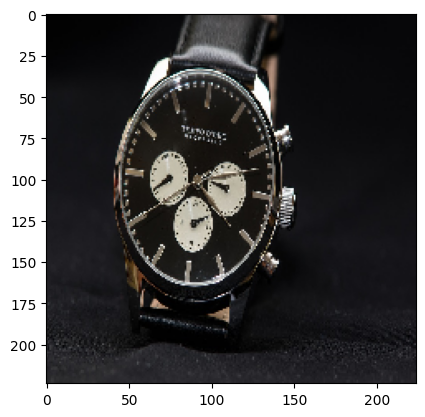

In [87]:
plt.imshow(sample_image)

In [88]:
#Convert to the nupy array and normalize the pixels from 0 to 1
sample_image = np.array(sample_image) / 255.0

In [89]:
sample_image.shape

(224, 224, 3)

In [90]:
#Try do a prediction using the stopwatch picture
predicted_class = trained_MobileNet.predict(np.expand_dims(sample_image, axis = 0))

1/1 [==============================] - 1s 535ms/step


In [91]:
predicted_class#Chances for each class

array([[ 0.31899288,  0.6976617 , -0.48101687, ...,  0.22585547,
        -1.4412357 , -0.0252165 ]], dtype=float32)

In [92]:
len(predicted_class[0])#There are 1001 classes in the model

1001

In [93]:
predicted_class.shape

(1, 1001)

In [94]:
predicted_class = np.argmax(predicted_class)
predicted_class

827

In [95]:
#Download the content of ImageNetLabels.txt file in the URL and storage in the variable
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

In [96]:
#Read the content and organize as a array
imagenet_labels = np.array(open(labels_path).read().splitlines())

In [97]:
imagenet_labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

In [98]:
len(imagenet_labels)

1001

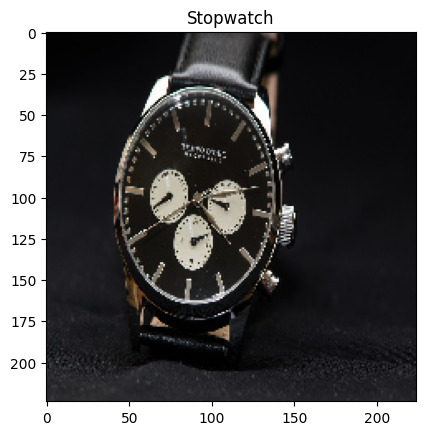

In [99]:
plt.imshow(sample_image)
predicted_class_name = imagenet_labels[predicted_class]#Get the name of the predicted class
plt.title(predicted_class_name.title());

1/1 [==============================] - 0s 54ms/step


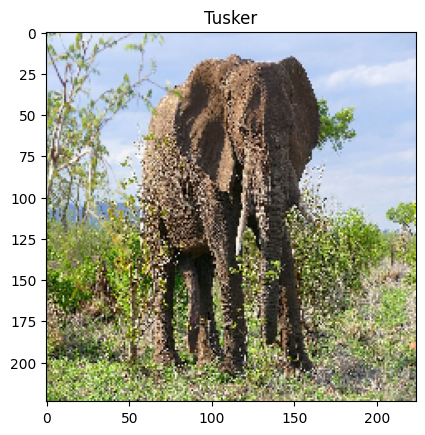

In [100]:
#Loads the image
sample_image= tf.keras.preprocessing.image.load_img(r'/content/Transfer Learning Data/African_Elephant.jpg',
                                                    target_size = (224, 224))
#Convert to the nupy array and normalize the pixels from 0 to 1
sample_image = np.array(sample_image) / 255.0
#Try do a prediction using the elephant picture
predicted_class = trained_MobileNet.predict(np.expand_dims(sample_image, axis = 0))
predicted_class = np.argmax(predicted_class)
plt.imshow(sample_image)
predicted_class_name = imagenet_labels[predicted_class]#Get the name of the predicted class
plt.title(predicted_class_name.title());

# Etapa 4: Testes com um conjunto de imagens

In [113]:
#Storage the URL of the images
flowers_data_url = tf.keras.utils.get_file('flower_photos',
                                           'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                            untar=True)

'/root/.keras/datasets/flower_photos'

In [114]:
#This command pre-process the image rescaling the image as 1/255
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
#Read the images storage in the URL and pre-process it
flower_data = image_generator.flow_from_directory(str(flowers_data_url),
                                                  target_size=(224,224),
                                                  batch_size=64,
                                                  shuffle=True)
# flowers_data_url => Informs the variable with the URL of images
# target_size = (224,224) => Informs the image size
# batch_size = 64, #It ifnorms the batchs of the training. It will adjust the weights from 32 to 32 images
# shuffle = True => Mix the images randomlly

Found 3670 images belonging to 5 classes.


In [105]:
for flowers_data_input_batch, flowers_data_label_batch in flower_data:
  print("Image batch shape: ", flowers_data_input_batch.shape)
  print("Label batch shape: ", flowers_data_label_batch.shape)
  break

Image batch shape:  (64, 224, 224, 3)
Label batch shape:  (64, 5)


In [104]:
#try do a prediction
predictions_batch = trained_MobileNet.predict(flowers_data_input_batch)
predictions_batch.shape

2/2 [==============================] - 4s 2s/step


(64, 1001)

In [107]:
#Get the labels
predicted_class_names = imagenet_labels[np.argmax(predictions_batch, axis=-1)]
predicted_class_names

array(['honeycomb', 'daisy', 'mushroom', 'cabbage butterfly',
       'greenhouse', 'bee', 'pot', 'porcupine', 'orange', 'cardoon',
       'mantis', 'daisy', 'fig', 'artichoke', 'bee', 'daisy', 'daisy',
       'pot', 'daisy', 'bee', 'rapeseed', 'daisy', 'daisy', 'earthstar',
       'daisy', 'bee', 'vase', 'park bench', 'daisy', 'Angora',
       'coral fungus', 'hip', 'horse cart', 'sea urchin', 'rapeseed',
       'gyromitra', 'jackfruit', 'daisy', 'conch', 'coral fungus', 'pug',
       'picket fence', 'fountain', 'coral fungus', 'daisy', 'vase',
       'daisy', 'grasshopper', 'daisy', 'bee', 'picket fence', 'daisy',
       'picket fence', 'daisy', 'daisy', 'birdhouse', 'daisy', 'daisy',
       'jigsaw puzzle', 'daisy', 'hip', 'paper towel',
       'sulphur butterfly', 'daisy'], dtype='<U30')

In [108]:
plt.figure(figsize=(15,15))
for n in range(64):
  plt.subplot(8,8,n+1)
  plt.imshow(flowers_data_input_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

# Etapa 5: Transfer learning

Download do MobileNet sem o topo do modelo:
https://tfhub.dev/s?module-type=image-feature-vector&q=tf2


In [109]:
#Get the URL of the convolutional layer
MobileNet_feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" #@param {type:"string"}

In [116]:
MobileNet_feature_extractor_layer = hub.KerasLayer(MobileNet_feature_extractor_url,
                                                   input_shape=(224, 224, 3))
#Loads and storage the convolutional layer in the variable

In [117]:
#Set the convolutional layer as a layer that cannot be modified
MobileNet_feature_extractor_layer.trainable = False

In [118]:
#Show the ammount of classes in the pre-processed images
flower_data.num_classes

5

In [119]:
model = tf.keras.Sequential([MobileNet_feature_extractor_layer,
                             tf.keras.layers.Dense(flower_data.num_classes, activation='softmax')])
#It get togheter the convolutional layer with a dense layer

In [120]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [121]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])#Compile the neural network

In [ ]:
history = model.fit_generator(flower_data, epochs=50)

<ipython-input-122-72326cffe83c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(flower_data, epochs=50)


Epoch 1/50
58/58 [==============================] - 174s 3s/step - loss: 0.8093 - accuracy: 0.7065
Epoch 2/50
58/58 [==============================] - 174s 3s/step - loss: 0.3869 - accuracy: 0.8741
Epoch 3/50
58/58 [==============================] - 164s 3s/step - loss: 0.3116 - accuracy: 0.9011
Epoch 4/50
58/58 [==============================] - 170s 3s/step - loss: 0.2632 - accuracy: 0.9193
Epoch 5/50
58/58 [==============================] - 166s 3s/step - loss: 0.2346 - accuracy: 0.9294
Epoch 6/50
58/58 [==============================] - 168s 3s/step - loss: 0.2074 - accuracy: 0.9387
Epoch 7/50
58/58 [==============================] - 172s 3s/step - loss: 0.1868 - accuracy: 0.9444
Epoch 8/50
58/58 [==============================] - 169s 3s/step - loss: 0.1722 - accuracy: 0.9520
Epoch 9/50
58/58 [==============================] - 165s 3s/step - loss: 0.1555 - accuracy: 0.9599
Epoch 10/50
58/58 [==============================] - 166s 3s/step - loss: 0.1457 - accuracy: 0.9624
Epoch 11/

# Etapa 6: Avaliação do modelo

In [ ]:
#short the labels
class_names = sorted(flower_data.class_indices.items(), key = lambda pair:pair[1])

In [ ]:
class_names

[('daisy', 0),
 ('dandelion', 1),
 ('roses', 2),
 ('sunflowers', 3),
 ('tulips', 4)]

In [ ]:
#Put the labels in a Numpy array
class_names = np.array([key.title() for key, value in class_names])

In [ ]:
class_names

array(['Daisy', 'Dandelion', 'Roses', 'Sunflowers', 'Tulips'],
      dtype='<U10')

In [ ]:
#Try predict the object in the image
predicted_batch = model.predict(flowers_data_input_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

In [ ]:
predicted_id

array([0, 4, 1, 4, 2, 4, 3, 2, 4, 0, 1, 1, 3, 1, 1, 2, 4, 0, 1, 1, 4, 3,
       2, 2, 1, 4, 0, 2, 1, 4, 0, 3, 4, 0, 3, 0, 0, 1, 3, 4, 3, 4, 3, 3,
       2, 0, 1, 0, 0, 1, 1, 3, 4, 3, 3, 1, 4, 1, 0, 1, 0, 1, 0, 4])

In [ ]:
predicted_label_batch

array(['Daisy', 'Tulips', 'Dandelion', 'Tulips', 'Roses', 'Tulips',
       'Sunflowers', 'Roses', 'Tulips', 'Daisy', 'Dandelion', 'Dandelion',
       'Sunflowers', 'Dandelion', 'Dandelion', 'Roses', 'Tulips', 'Daisy',
       'Dandelion', 'Dandelion', 'Tulips', 'Sunflowers', 'Roses', 'Roses',
       'Dandelion', 'Tulips', 'Daisy', 'Roses', 'Dandelion', 'Tulips',
       'Daisy', 'Sunflowers', 'Tulips', 'Daisy', 'Sunflowers', 'Daisy',
       'Daisy', 'Dandelion', 'Sunflowers', 'Tulips', 'Sunflowers',
       'Tulips', 'Sunflowers', 'Sunflowers', 'Roses', 'Daisy',
       'Dandelion', 'Daisy', 'Daisy', 'Dandelion', 'Dandelion',
       'Sunflowers', 'Tulips', 'Sunflowers', 'Sunflowers', 'Dandelion',
       'Tulips', 'Dandelion', 'Daisy', 'Dandelion', 'Daisy', 'Dandelion',
       'Daisy', 'Tulips'], dtype='<U10')

In [ ]:
label_id = np.argmax(flowers_data_label_batch, axis=-1)
label_id

array([0, 4, 1, 4, 2, 4, 3, 2, 4, 0, 1, 1, 3, 1, 1, 2, 4, 0, 1, 1, 4, 3,
       2, 2, 1, 4, 0, 2, 1, 4, 0, 3, 4, 0, 3, 0, 0, 1, 3, 4, 3, 4, 3, 3,
       2, 0, 1, 0, 0, 1, 1, 3, 4, 3, 3, 1, 4, 1, 0, 1, 0, 1, 0, 4])

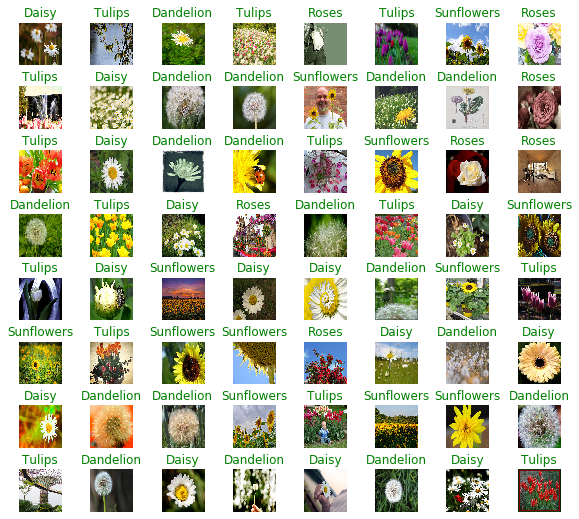

In [ ]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(64):
  plt.subplot(8,8,n+1)
  plt.imshow(flowers_data_input_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')